# **Data Visualization**


The data set will be presented to you in the form of a RDBMS. **SQL** queries will be used to extract the data.<p/>

- Visualize the distribution of data.
- Visualize the relationship between two features.
- Visualize composition of data.
- Visualize comparison of data

Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-01-13 15:41:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  26.7MB/s    in 1.3s    

2023-01-13 15:41:23 (26.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

### To run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

## To list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## To run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## To describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [3]:
QUERY = """
SELECT *
FROM master
"""
data = pd.read_sql_query(QUERY,conn)
data.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [4]:
data.drop('index', axis=1, inplace=True)

In [5]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",None,...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

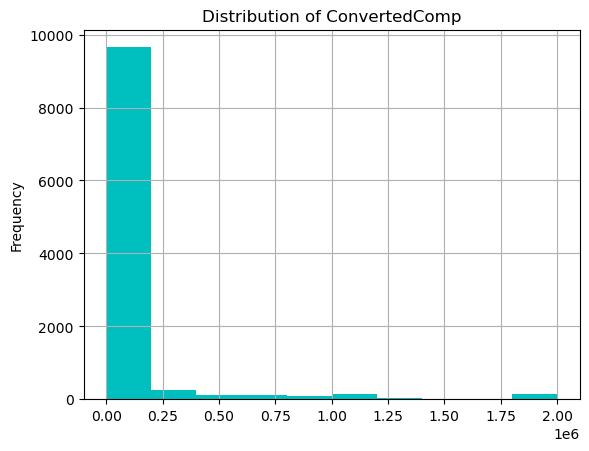

In [8]:
data.ConvertedComp.plot(kind="hist", title="Distribution of ConvertedComp", grid=True, color="c")
plt.show()

### Box Plots


Plot a box plot of `Age.`


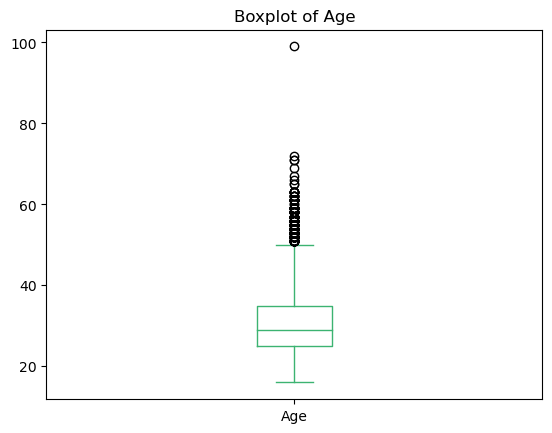

In [9]:
data.Age.plot(kind="box", title="Boxplot of Age", color="mediumseagreen")
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


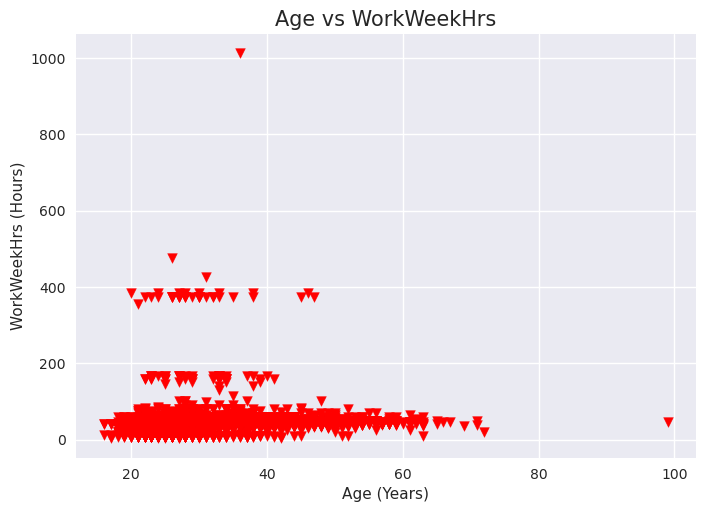

In [10]:
plt.style.use("seaborn")

plt.scatter(data["Age"], data["WorkWeekHrs"], color="red", marker="v")
plt.title("Age vs WorkWeekHrs", fontsize=15)
plt.xlabel("Age (Years)")
plt.ylabel("WorkWeekHrs (Hours)")
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


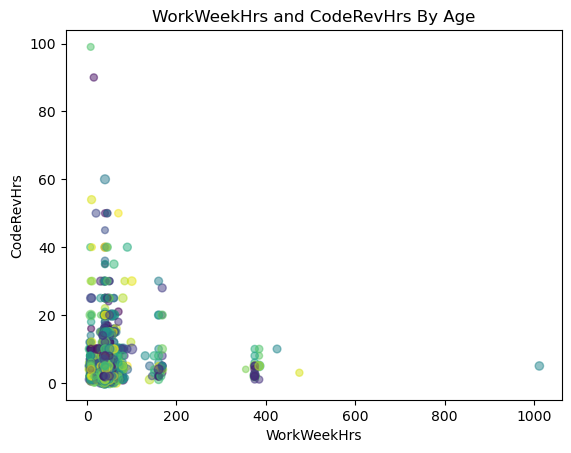

In [11]:
import numpy as np
plt.style.use("default")
colors = np.random.rand(11398)
plt.scatter(data["WorkWeekHrs"], data["CodeRevHrs"], s=data["Age"], c=colors, alpha=0.5)
plt.title("WorkWeekHrs and CodeRevHrs By Age")
plt.xlabel("WorkWeekHrs")
plt.ylabel("CodeRevHrs")
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


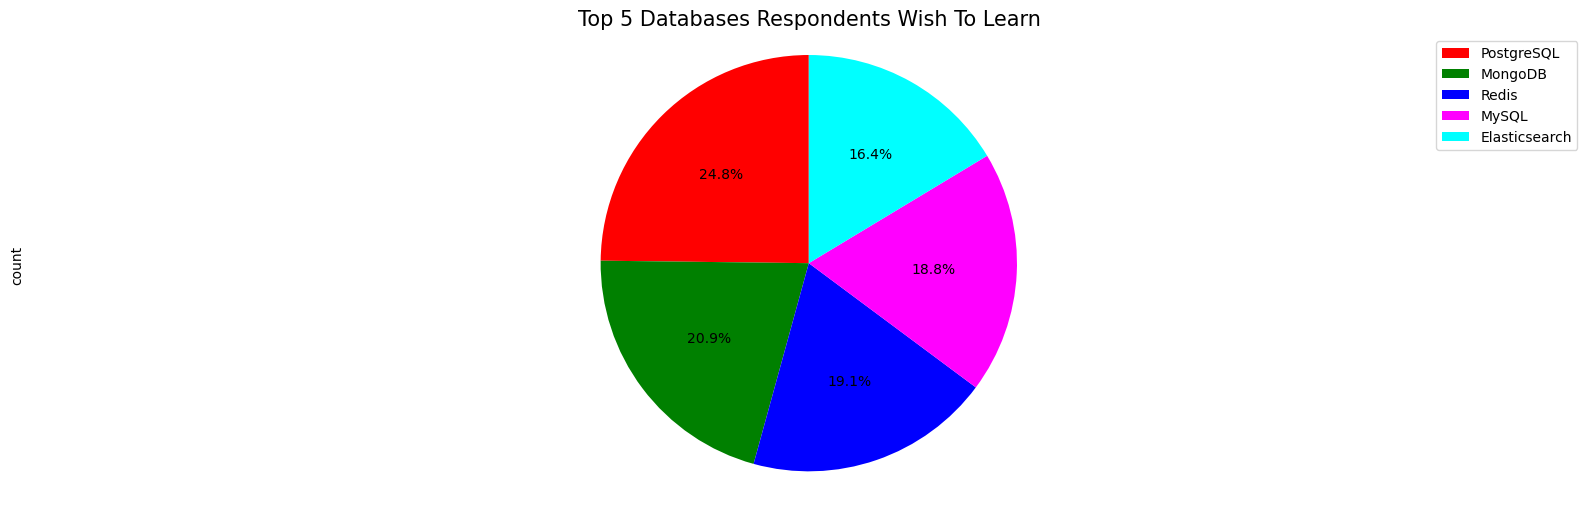

In [12]:
QUERY = """ 
SELECT DatabaseDesireNextYear, COUNT(*) as count 
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5 
""" 

df=pd.read_sql_query(QUERY,conn)  
df.set_index('DatabaseDesireNextYear', inplace=True) 

colors_list=['red', 'green', 'blue', 'magenta', 'cyan', 'pink']

df['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90, colors=colors_list)  

plt.legend(labels=df.index, loc='upper right')
plt.title('Top 5 Databases Respondents Wish To Learn', fontsize=15) 
plt.axis('equal')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [13]:
df1 = data[["WorkWeekHrs", "CodeRevHrs", "Age"]]
df1.head()

,WorkWeekHrs,CodeRevHrs,Age
0,80.0,NaN,22.0
1,32.0,12.0,23.0
2,40.0,5.0,28.0
3,40.0,NaN,26.0
4,45.0,5.0,29.0


In [14]:
df2 = df1[(df1["Age"] >= 30) & (df1["Age"] <= 35)]
df2.head()

,WorkWeekHrs,CodeRevHrs,Age
5,8.0,3.0,31.0
11,40.0,2.0,34.0
12,40.0,2.0,32.0
18,42.0,15.0,34.0
22,40.0,2.0,33.0


In [15]:
df3 = df2.groupby('Age').median()

df3.head()

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0


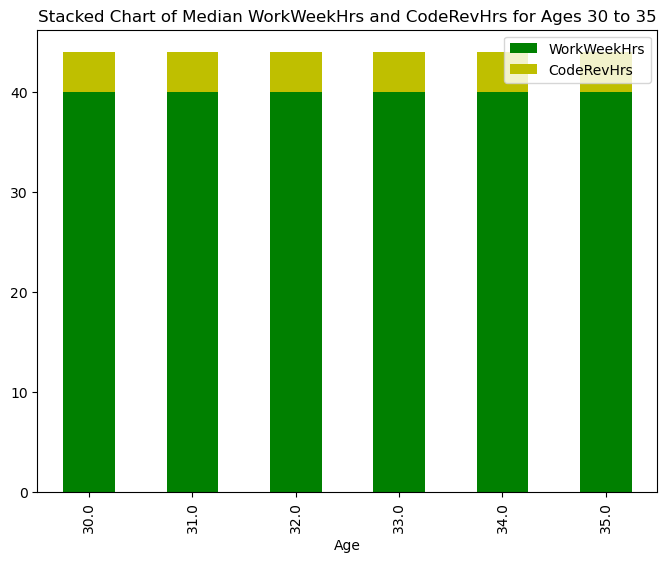

In [16]:
df3.plot(kind='bar', figsize=(8, 6), stacked=True, color=['g','y'])
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Ages 30 to 35')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [17]:
data1 = data[["ConvertedComp", "Age"]]
df4 = data1[(data1["Age"] >= 45) & (data1["Age"] <= 60)]
df4.head()

,ConvertedComp,Age
7,103000.0,47.0
50,NaN,54.0
66,54996.0,47.0
75,62807.0,47.0
93,72522.0,45.0


In [18]:
df5 = df4.groupby('Age').median()
df5.head()

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0


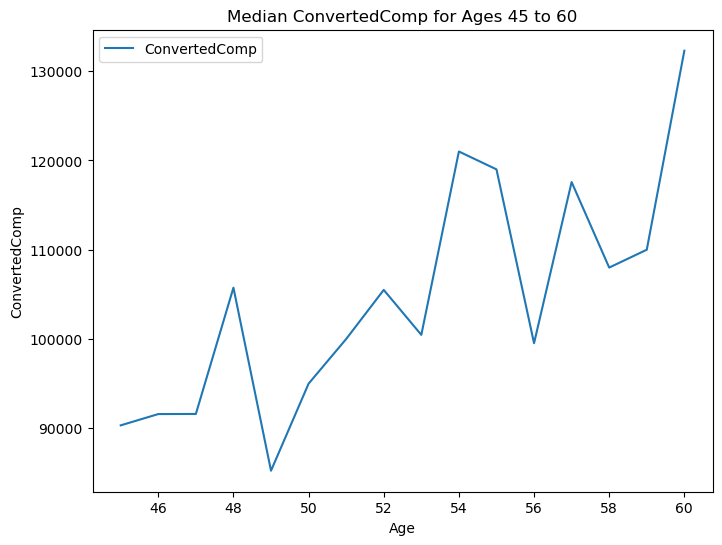

In [19]:
df5.plot(kind='line', figsize=(8, 6))
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [39]:
df6 = data[["MainBranch"]]
df6.head()

,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession


In [40]:
df6.value_counts()

MainBranch                                                                   
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
dtype: int64

In [37]:
df6["MainBranch"].replace('I am a developer by profession', 0, inplace=True)
df6["MainBranch"].replace('I am not primarily a developer, but I write code sometimes as part of my work', , inplace=True)
df6.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,MainBranch
0,1
1,1
2,1
3,1
4,1


In [38]:
df6.value_counts()

MainBranch
1             10618
0               780
dtype: int64

In [30]:
df7 = df6.value_counts()
# df7.index.replace('I am a developer by profession', 0, inplace=True)
# df7.index.replace('I am not primarily a developer, but I write code sometimes as part of my work', 0, inplace=True)

10618
780


MultiIndex([(                                               'I am a developer by profession',),
            ('I am not primarily a developer, but I write code sometimes as part of my work',)],
           names=['MainBranch'])

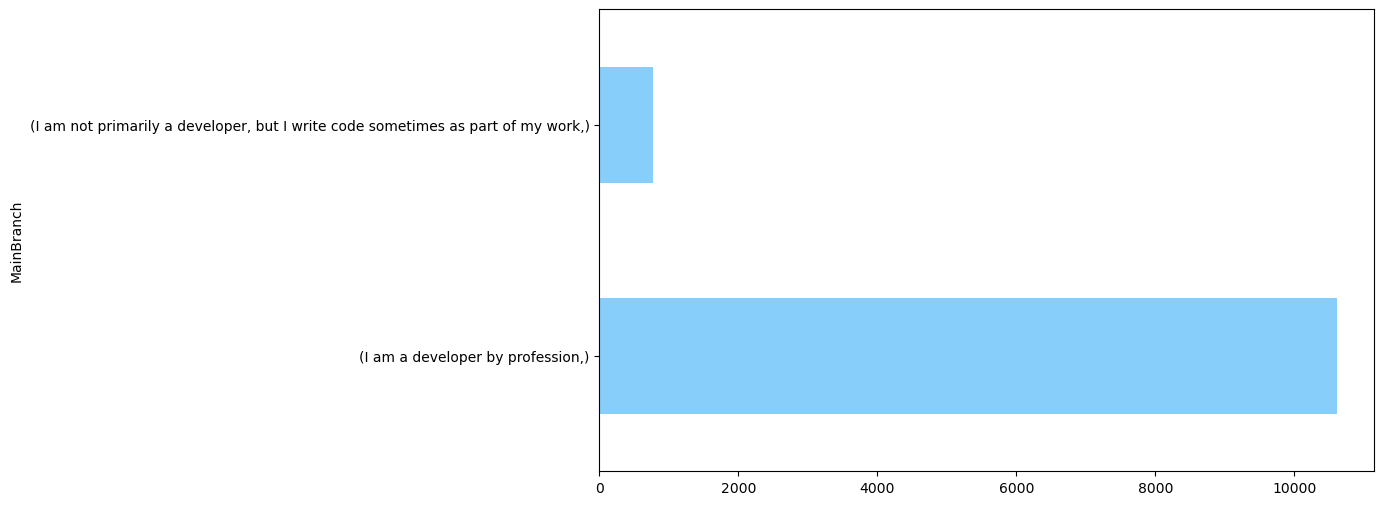

In [25]:
df7.plot(kind='barh', figsize=(10,6), color='lightskyblue')
plt.show()

Close the database connection.


In [ ]:
conn.close()

***Authors: Ramesh Sannareddy***
***Alteration: Sochi Obodozie***

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
